In [41]:
import kagglehub
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Download the dataset using kagglehub
data_dir = kagglehub.dataset_download("orvile/brain-cancer-mri-dataset")

# Step 2: Update internal path to the actual image folder within the downloaded dataset
data_dir = os.path.join(data_dir, "Brain_Cancer raw MRI data", "Brain_Cancer")

categories = ['brain_glioma', 'brain_menin', 'brain_tumor']
img_size = 128  # Resize to 128x128 for computational efficiency

# Debug: Verify the directory contents
print("Contents of data_dir:")
print(os.listdir(data_dir))

# Load images and labels
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)  # 0, 1, or 2
    try:
        files = os.listdir(path)
        print(f"Found {len(files)} files in {path}")
        for img in files:
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img_array is None:
                    print(f"Failed to load image: {img_path}")
                    continue
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    except Exception as e:
        print(f"Error accessing directory {path}: {e}")

# Check if data was loaded
if len(data) == 0:
    raise ValueError("No images were loaded. Check the directory paths and image files.")

# Convert to numpy arrays
data = np.array(data).reshape(-1, img_size, img_size, 1)  # Add channel dimension
labels = np.array(labels)

# Normalize pixel values to [0, 1]
data = data / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=3)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Contents of data_dir:
['brain_menin', 'brain_tumor', 'brain_glioma']
Found 2004 files in /Users/eazdanmostafarafin/.cache/kagglehub/datasets/orvile/brain-cancer-mri-dataset/versions/2/Brain_Cancer raw MRI data/Brain_Cancer/brain_glioma
Found 2004 files in /Users/eazdanmostafarafin/.cache/kagglehub/datasets/orvile/brain-cancer-mri-dataset/versions/2/Brain_Cancer raw MRI data/Brain_Cancer/brain_menin
Found 2048 files in /Users/eazdanmostafarafin/.cache/kagglehub/datasets/orvile/brain-cancer-mri-dataset/versions/2/Brain_Cancer raw MRI data/Brain_Cancer/brain_tumor
Training set: (4844, 128, 128, 1), Validation set: (606, 128, 128, 1), Test set: (606, 128, 128, 1)


In [42]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming img_size, X_train, y_train, X_val, y_val are already defined

start_time = time.time()  # Record the start time

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val))

end_time = time.time()  # Record the end time

print(f"Running time: {end_time - start_time:.6f} seconds")

/Users/eazdanmostafarafin/tf-macos/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.4843 - loss: 1.0120 - val_accuracy: 0.6865 - val_loss: 0.7379
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6318 - loss: 0.8140 - val_accuracy: 0.7129 - val_loss: 0.6690
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6695 - loss: 0.7567 - val_accuracy: 0.7789 - val_loss: 0.5809
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7329 - loss: 0.6371 - val_accuracy: 0.7789 - val_loss: 0.5390
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7741 - loss: 0.5829 - val_accuracy: 0.7954 - val_loss: 0.5080
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7823 - loss: 0.5664 - val_accuracy: 0.7987 - val_loss: 0.5246
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.7898 - loss: 0.5700 - val_accuracy: 0.7970 - val_loss: 0.6456
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8176 - loss: 0.4821 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8509 - loss: 0.6030
Test Accuracy: 0.8515, Test Loss: 0.5794


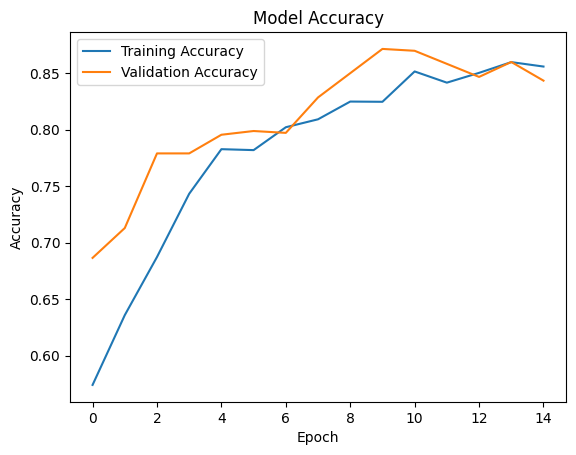

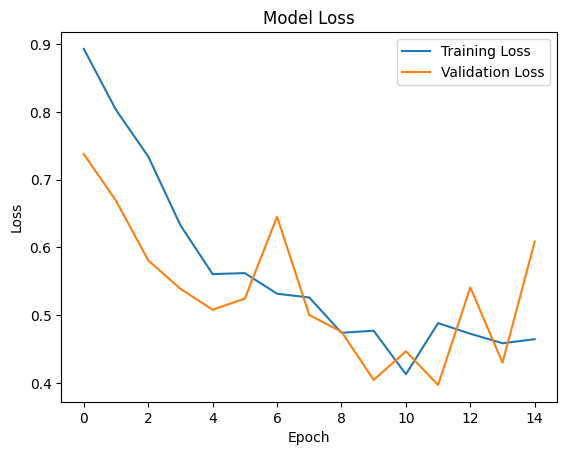

In [43]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


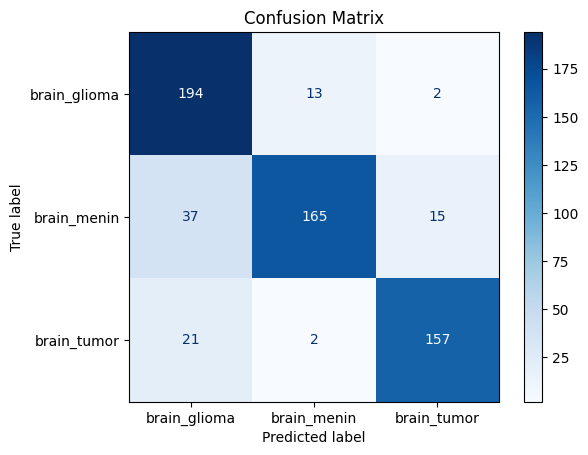

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

start_time = time.time()  # Record the start time

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# Train the model with augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=15,
          validation_data=(X_val, y_val))

end_time = time.time()  # Record the end time

print(f"Running time: {end_time - start_time:.6f} seconds")

Epoch 1/15


/Users/eazdanmostafarafin/tf-macos/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6285 - loss: 1.2403 - val_accuracy: 0.8267 - val_loss: 0.4608
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7245 - loss: 0.7550 - val_accuracy: 0.8581 - val_loss: 0.5134
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7216 - loss: 0.8107 - val_accuracy: 0.8333 - val_loss: 0.6425
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7653 - loss: 0.6819 - val_accuracy: 0.8432 - val_loss: 0.4108
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7829 - loss: 0.5938 - val_accuracy: 0.8795 - val_loss: 0.3921
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7647 - loss: 0.7675 - val_accuracy: 0.8911 - val_loss: 0.3162
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8120 - loss: 0.5012 - val_accuracy: 0.8696 - val_loss: 0.3490
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8082 - loss: 0.5584 - val_accuracy: 0.894

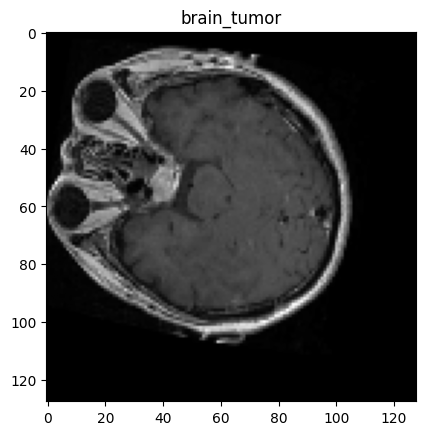

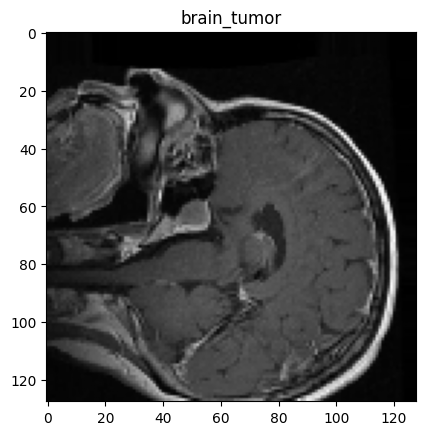

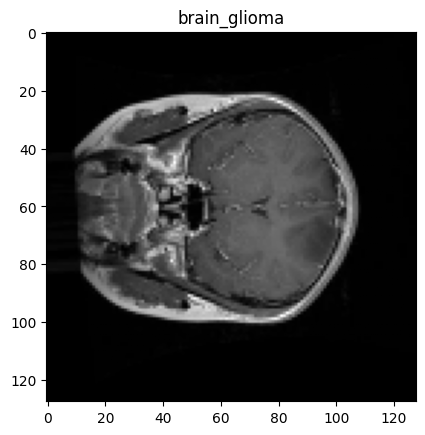

In [46]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.imshow(X_train[i].reshape(img_size, img_size), cmap='gray')
    plt.title(categories[np.argmax(y_train[i])])
    plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8991 - loss: 0.3678
Test Accuracy: 0.9010, Test Loss: 0.3565


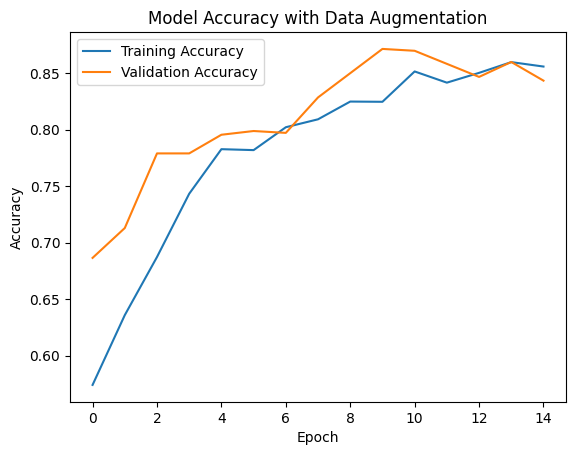

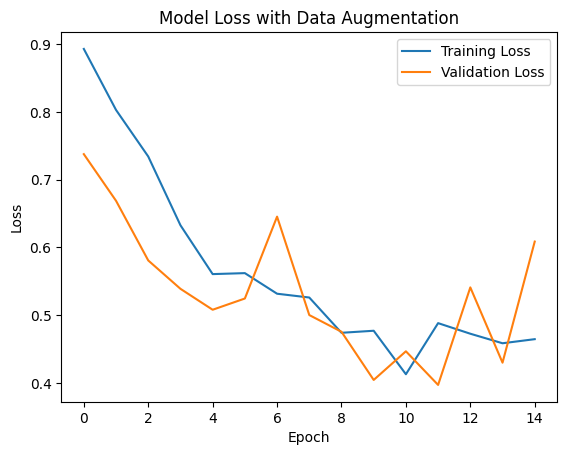

In [47]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

              precision    recall  f1-score   support

brain_glioma       0.77      0.93      0.84       209
 brain_menin       0.92      0.76      0.83       217
 brain_tumor       0.90      0.87      0.89       180

    accuracy                           0.85       606
   macro avg       0.86      0.85      0.85       606
weighted avg       0.86      0.85      0.85       606

